<a href="https://colab.research.google.com/github/gustavogrds/EDA_2022_1SEM/blob/main/trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
d1=pd.read_csv('HIST_PAINEL_COVIDBR_2021_Parte1_02jun2022.csv',sep=';')
d2=pd.read_csv('HIST_PAINEL_COVIDBR_2021_Parte2_02jun2022.csv',sep=';')
dados=pd.concat([d1,d2])
dados.index=range(0,len(dados))

# Pergunta 1
### Qual a região com maior número óbitos? 
### Qual a região com a maior média de número óbitos? 
### gráfico dos obitos de barras com número obitos por mês

In [ ]:
dtObitos=dados[['regiao','obitosAcumulado']].groupby('regiao').sum().drop('Brasil').sort_values(by='obitosAcumulado',ascending=False)
dtObitos['regiao']=dtObitos.index
dtObitos.index=range(0,len(dtObitos))
print('A região com maior número de óbitos é a regiao ' + dtObitos['regiao'][0] + ' com um número de óbitos de ' + '{}'.format(dtObitos['obitosAcumulado'][0])+'.')

A região com maior número de óbitos é a regiao Sudeste com um número de óbitos de 158345934.


In [ ]:
dtMediaObitos=dados[['regiao','obitosAcumulado']].groupby('regiao').mean().drop('Brasil').sort_values(by='obitosAcumulado',ascending=False)
dtMediaObitos['regiao']=dtMediaObitos.index
dtMediaObitos.index=range(0,len(dtMediaObitos))
print('A região com maior média de número de óbitos é a regiao ' + dtMediaObitos['regiao'][0] + ' com uma média de número de óbitos de {}'.format(round(dtMediaObitos['obitosAcumulado'][0],4))+'.')

A região com maior média de número de óbitos é a regiao Sudeste com uma média de número de óbitos de 258.8452.


In [ ]:
meses={1:'01_Janeiro',2:'02_Fevereiro',3:'03_Março',4:'04_Abril',5:'05_Maio',6:'06_Junho',7:'07_Julho',8:'08_Agosto',
     9:'09_Setembro',10:'10_Outubro',11:'11_Novembro',12:'12_Dezembro'}
dados['mes']=[meses[int(x[5:7])] for x in dados['data']]
dadosGrafico=dados[['mes','obitosAcumulado']].groupby('mes').sum()
dadosGrafico['mes']=dadosGrafico.index
dadosGrafico.index=range(0,len(dadosGrafico))

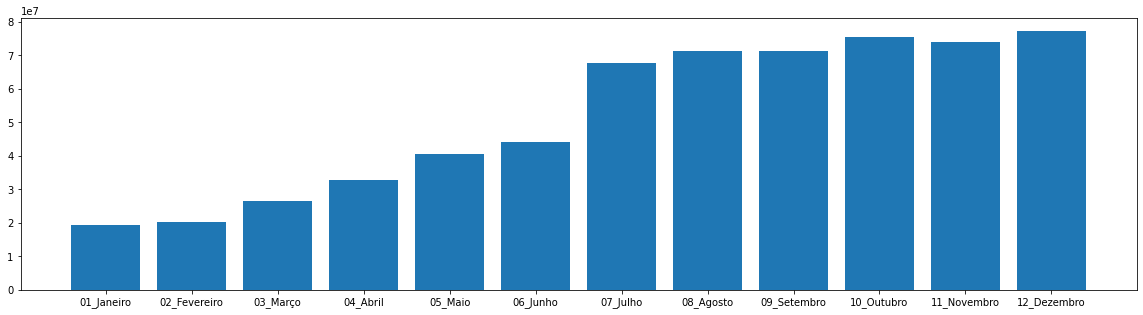

In [ ]:
plt.figure(figsize=(20, 5))
plt.bar(dadosGrafico['mes'],dadosGrafico['obitosAcumulado'])
plt.show()

# Pergunta 2
### Em qual mês os casos novos pararam de crescer?
### gráfico dos casos novos

In [ ]:
dadosGrafico=dados[['mes','casosNovos']].groupby('mes').mean()
dadosGrafico['mes']=dadosGrafico.index
dadosGrafico.index=range(0,len(dadosGrafico))

In [ ]:
dadosGrafico['Bandas']=((dadosGrafico['casosNovos']/dadosGrafico['casosNovos'].shift(1))-1)*100
dadosGrafico.fillna(0,inplace=True)

In [ ]:
dadosGrafico

,casosNovos,mes,Bandas
0,26.329297,01_Janeiro,0.000000
1,25.675540,02_Fevereiro,-2.483005
2,37.846615,03_Março,47.403386
3,33.996512,04_Abril,-10.172913
4,32.491311,05_Maio,-4.427515
5,35.799733,06_Junho,10.182482
6,31.484303,07_Julho,-12.054365
7,19.808471,08_Agosto,-37.084614
8,15.458582,09_Setembro,-21.959738
9,8.845851,10_Outubro,-42.777089


#### é possível notar que a média de casos novos desacelara depois de julho/2021

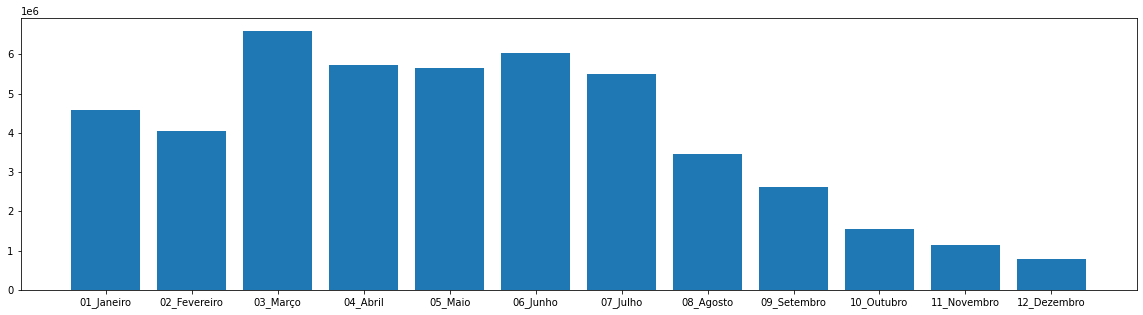

In [ ]:
dadosGrafico=dados[['mes','casosNovos']].groupby('mes').sum()
dadosGrafico['mes']=dadosGrafico.index
dadosGrafico.index=range(0,len(dadosGrafico))
plt.figure(figsize=(20, 5))
plt.bar(dadosGrafico['mes'],dadosGrafico['casosNovos'])
plt.show()

# Pergunta 3
### Em qual a mês a curva de obitosAcumulado se estabiliza?

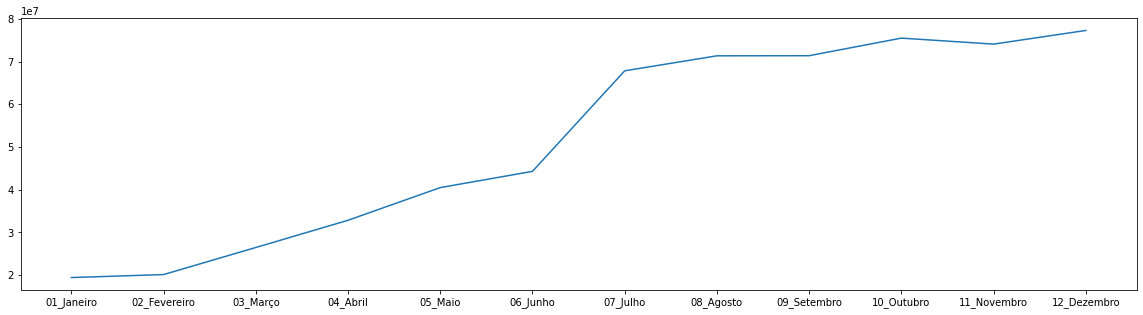

In [ ]:
dadosGrafico=dados[['mes','obitosAcumulado']].groupby('mes').sum()
dadosGrafico['mes']=dadosGrafico.index
dadosGrafico.index=range(0,len(dadosGrafico))
plt.figure(figsize=(20, 5))
plt.plot(dadosGrafico['mes'],dadosGrafico['obitosAcumulado'])

Os óbitos estabilizam no mesmo mês que os casos de casos novos estabilizaram, o que deve-se em grande parte ao início da campanha de vacinação em massa. 

## Pergunta 4
### Qual dia ocorre o maior BUM de casos novos? 
### Qual dia ocorre o menor BUM de casos novos? 

In [ ]:
dtMax=dados[dados['casosNovos']==dados['casosNovos'].max()]['data'].drop_duplicates()
dtMax.index=range(0,len(dtMax))

dtMin=dados[dados['casosNovos']==dados['casosNovos'].min()]['data'].drop_duplicates()
dtMin.index=range(0,len(dtMin))

In [ ]:
print('O dia que ocorre o maior BUM de casos novos é '+str(dtMax.loc[0]+'.'))
print()
print('O dia que ocorre o menor BUM de casos novos é '+str(dtMin.loc[0]+'.'))

O dia que ocorre o maior BUM de casos novos é 2021-09-18.

O dia que ocorre o menor BUM de casos novos é 2021-11-24.


## Pergunta 5
### Qual dia do mês geralmente é o menor de casos novos?

In [ ]:
l=[]

for mesSelecao in dados['mes'].drop_duplicates():
    dt=dados[dados['mes']==mesSelecao]
    dt.index=range(0,len(dt))
    
    dtMin=dt[dt['casosNovos']==dt['casosNovos'].min()]['data'].drop_duplicates()
    dtMin.index=range(0,len(dtMin))
    dtMin=dtMin[0][-2:]
    l.append([dtMin,mesSelecao])

In [ ]:
dt=pd.DataFrame(l,columns=['Dia','Mês'])
dt=dt[['Mês','Dia']]

In [ ]:
dt

,Mês,Dia
0,01_Janeiro,07
1,02_Fevereiro,19
2,03_Março,10
3,04_Abril,08
4,05_Maio,24
5,06_Junho,04
6,07_Julho,02
7,08_Agosto,03
8,09_Setembro,21
9,10_Outubro,06


In [ ]:
i=0
for x in dt['Dia']:
    i+=int(x)
mediaDia=int(round(i/30,0))

5

In [ ]:
print('Em dia todo dia '+str(mediaDia)+' tem menos casos que o mês todo.')

Em dia todo dia 5 tem menos casos que o mês todo.


# Pergunta 6
#### Qual o dia de mais obitos do ano de 2021?
#### Qual o dia de menos obitos do ano de 2021?
#### Existe algum dia que nçao morreu ninguém de covid?

In [ ]:
dtMax=dados[dados['obitosNovos']==dados['obitosNovos'].max()]
dtMin=dados[dados['obitosNovos']==dados['obitosNovos'].min()]

In [ ]:
dados[dados['obitosNovos']==0][['data','obitosNovos']]

,data,obitosNovos
339,2021-06-08,0
354,2021-06-23,0
370,2021-01-09,0
377,2021-01-16,0
502,2021-05-21,0
...,...,...
2051851,2021-12-12,0
2051857,2021-12-18,0
2051858,2021-12-19,0
2051864,2021-12-25,0
